IMPORT THE REQUIRED LIBRARIES


In [156]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as datetime
import calendar
import plotly.graph_objects as go
import plotly.express as px

 IMPORT THE DATA 

In [94]:
data = pd.read_csv(r"C:\Users\Abdulmalik Lasisi\Downloads\Unemployment in India (1).csv")

In [62]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DATA PROCESSING

In [97]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [98]:
data.dropna(inplace = True)
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [99]:
data.notnull().sum()

Region                                      740
 Date                                       740
 Frequency                                  740
 Estimated Unemployment Rate (%)            740
 Estimated Employed                         740
 Estimated Labour Participation Rate (%)    740
Area                                        740
dtype: int64

In [100]:
data = data.drop_duplicates()

In [77]:
data.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [78]:
data.tail()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [110]:
data.rename(columns = {'Region' : 'State'}, inplace = True)
data.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   State                                     740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [13]:
data.shape

(740, 7)

In [81]:
data.dtypes

State                                        object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [16]:
data[' Date']. value_counts()

 Date
 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-05-2020    51
 30-06-2020    50
Name: count, dtype: int64

In [106]:
data[' Date'] = pd.to_datetime(data[' Date'],dayfirst = True)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   State                                     740 non-null    object        
 1    Date                                     740 non-null    datetime64[ns]
 2    Frequency                                740 non-null    object        
 3    Estimated Unemployment Rate (%)          740 non-null    float64       
 4    Estimated Employed                       740 non-null    float64       
 5    Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                      740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


CHANGING THE DATATYPE OF DATE FROM OBJECT TO DATE

In [107]:
data['month_int'] = data[' Date'].dt.month

In [88]:
data.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9


In [89]:
data['month'] = data['month_int'].apply(lambda x: calendar.month_abbr[x])
data.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month_int,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep


In [90]:
data = data.groupby(['month'])[[' Estimated Unemployment Rate (%)', ' Estimated Employed',' Estimated Labour Participation Rate (%)']].mean()
data = pd.DataFrame(data).reset_index()

BAR PLOT OF UNEMPLOYMENT RATE AND LABOUR PARTICIPATION RATE 



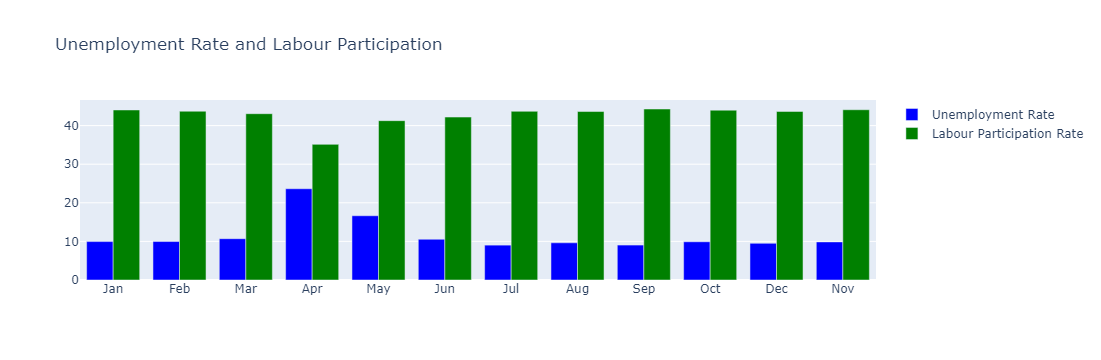

In [91]:
month = data.month
unemployment_rate = data[' Estimated Unemployment Rate (%)']
labour_participation_rate = data[' Estimated Labour Participation Rate (%)']

fig = go.Figure()
fig.add_trace(go.Bar(x=month, y=unemployment_rate, name='Unemployment Rate', marker=dict(color='blue')))
fig.add_trace(go.Bar(x=month, y=labour_participation_rate, name='Labour Participation Rate', marker=dict(color='green')))
fig.update_layout(title = 'Unemployment Rate and Labour Participation',
                  xaxis = {'categoryorder':'array','categoryarray':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']}      )
fig.show()

BAR PLOT OF ESTIMATED EMPLOYED CITIZEN IN EVERY MONTH

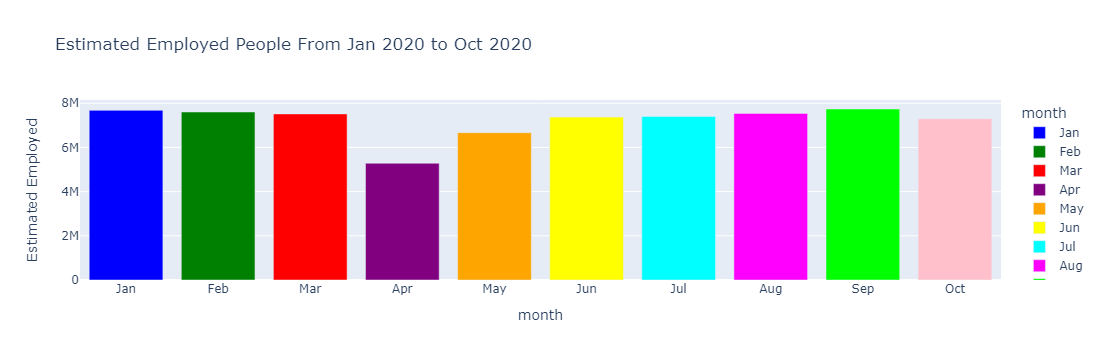

In [53]:
import plotly.express as px

data['month'] = pd.Categorical(data['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], ordered=True)

fig = px.bar(data,
             x='month',
             y=' Estimated Employed',
             color='month',
             color_discrete_map={'Jan': 'blue', 'Feb': 'green', 'Mar': 'red', 'Apr': 'purple', 'May': 'orange', 'Jun': 'yellow', 'Jul': 'cyan', 'Aug': 'magenta', 'Sep': 'lime', 'Oct': 'pink'},
             category_orders={'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']},
             title='Estimated Employed People From Jan 2020 to Oct 2020'
            )

fig.show()


STATE WISE ANALYSIS

In [66]:
state = data.groupby(['State'])[[' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']].mean()
state = pd.DataFrame(state).reset_index()

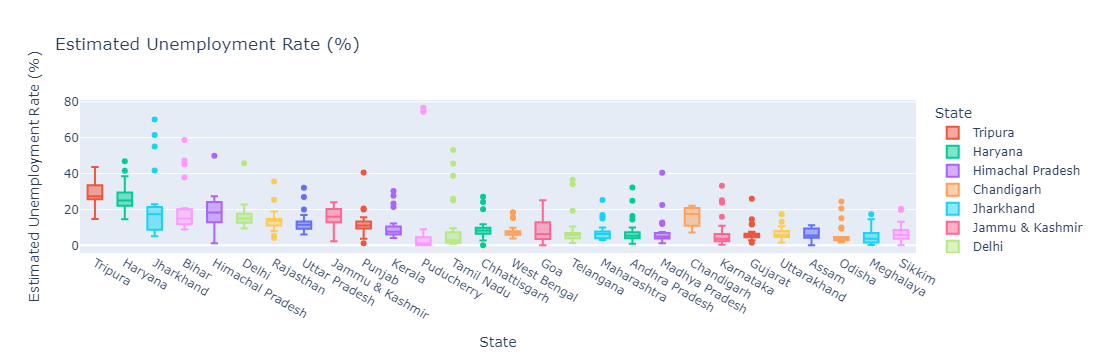

In [70]:
import plotly.express as px

fig = px.box(data_frame=data,
             x='State',
             y=' Estimated Unemployment Rate (%)',
             color='State',
             title='Estimated Unemployment Rate (%)',
             category_orders={'State': sorted(data['State'].unique(), key=lambda x: -data[data['State'] == x][' Estimated Unemployment Rate (%)'].median())},
             color_discrete_map={'State': 'blue'} 
            )

fig.update_layout(xaxis={'categoryorder': 'total descending'})

fig.show()


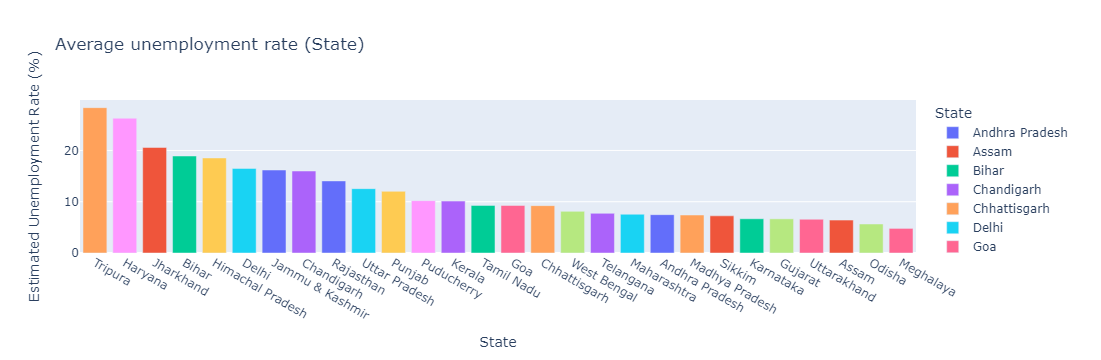

In [71]:
fig = px.bar(state,x='State',y=' Estimated Unemployment Rate (%)',color='State',title='Average unemployment rate (State)')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [116]:
data.columns

Index(['State', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'month_int'],
      dtype='object')

UNEMPLOYMENT RATE BEFORE AND AFTER LOCKDOWN


In [120]:
Data = pd.read_csv(r"C:\Users\Abdulmalik Lasisi\Desktop\Unemployment_Rate_upto_11_2020.csv")

In [139]:
before_lockdown = data[(data['month_int']>=1) &(data['month_int'] <4)]
after_lockdown = data[(data['month_int'] >=4) & (data['month_int'] <=6)]

In [141]:
Data.columns

Index(['State', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'regions', 'longitude', 'latitude'],
      dtype='object')

In [144]:
af_lockdown = after_lockdown.groupby('State')[' Estimated Unemployment Rate (%)'].mean().reset_index()

lockdown = before_lockdown.groupby('State')[' Estimated Unemployment Rate (%)'].mean().reset_index()
lockdown['unemployment rate before lockdown'] = af_lockdown[' Estimated Unemployment Rate (%)']

lockdown.columns = ['state','unemployment rate before lockdown','unemployment rate after lockdown']
lockdown.head()

,state,unemployment rate before lockdown,unemployment rate after lockdown
0,Andhra Pradesh,6.243333,11.126000
1,Assam,6.480000,6.563333
2,Bihar,14.276667,27.459000
3,Chandigarh,19.366667,12.656667
4,Chhattisgarh,8.683333,12.720000


In [146]:
lockdown['rate change in unemployment'] =round(lockdown['unemployment rate before lockdown']-lockdown['unemployment rate before lockdown']
                                              /lockdown['unemployment rate after lockdown'],2)

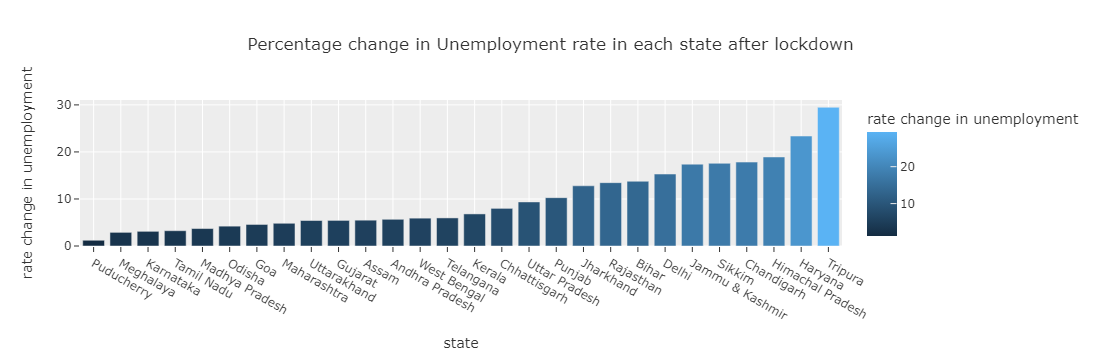

In [155]:
import plotly.express as px

fig = px.bar(lockdown,
             x='state',
             y='rate change in unemployment',
             color='rate change in unemployment',
             title='Percentage change in Unemployment rate in each state after lockdown',
             template='ggplot2',
             category_orders={'state': sorted(lockdown['state'].unique(), key=lambda x: -lockdown[lockdown['state'] == x]['rate change in unemployment'].mean())},
             color_discrete_map={0: 'red', 10: 'green', 20: 'Black'}  
            )

fig.update_layout(xaxis={'categoryorder': 'total ascending'})

fig.show()
